# Kandi työhön liittyviä simulaatioita

In [1]:
%matplotlib notebook
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from viivanleveys import *

plt.interactive(False)

def read_csv(filename):
    return np.genfromtxt(filename, delimiter=',')


## Tutkitaan kubittien lukumäärän vaikutusta mekaaniseen värähtelijään

[ 7.        +0.j         -3.50435697-0.86570541j -3.4907768 +0.86668278j
 ... -3.27500573-0.48662194j -1.30877699+0.64854917j
  4.58452286-0.16284478j]
(1.9993333333333112, -999.6666666666667)


/home/reetu/anaconda3/lib/python3.9/site-packages/scipy/signal/_spectral_py.py:1867: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


<IPython.core.display.Javascript object>


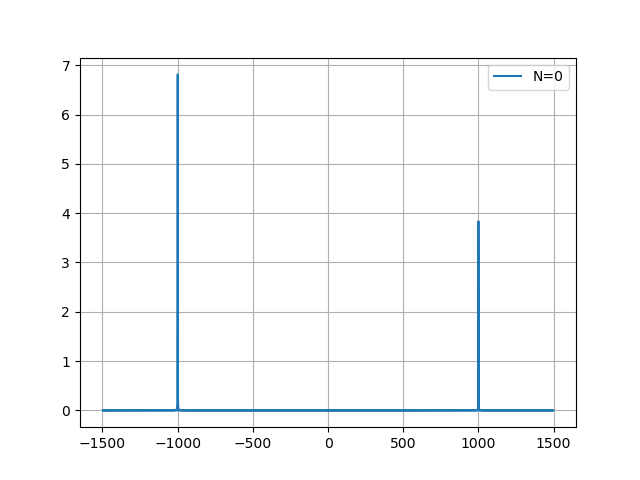

In [2]:
"""
Systeemin parametreiksi hilbertin avaruuden koko ja oskilaattorin viritystilojen lukumäärä
"""
N = 10  # Hilbert
n = 3   # Oskillaattori

"""
Luodaan simuloitavat aikapisteet 
"""
t_end = 1          # Kesto s
t_samps = 3000 # Mittauspisteitä
times = np.linspace(0, t_end, t_samps)  # Aikajana

omega_m = 1000*2*np.pi
omega_R = 1100*2*np.pi           # Qubitin taajuus pukemattomana
g = 10*2*np.pi                  # Kytkentä vakio
g_0 = 0


a3  = qt.tensor(qt.destroy(N), qt.identity(2), qt.identity(2), qt.identity(2))   # Luomis operaattori
sz31 = qt.tensor(qt.identity(N), qt.sigmaz(), qt.identity(2), qt.identity(2)) # Sigma_z
sz32 = qt.tensor(qt.identity(N), qt.identity(2), qt.sigmaz(), qt.identity(2))
sz33 = qt.tensor(qt.identity(N), qt.identity(2), qt.identity(2), qt.sigmaz())
sx31 = qt.tensor(qt.identity(N), qt.sigmax(), qt.identity(2), qt.identity(2)) # Sigma_x
sx32 = qt.tensor(qt.identity(N), qt.identity(2), qt.sigmax(), qt.identity(2))
sx33 = qt.tensor(qt.identity(N), qt.identity(2), qt.identity(2), qt.sigmax())
X = (a3.dag() + a3)                # paikka/siirtymä

psi0 = qt.tensor(qt.states.fock_dm(N, n), qt.ket2dm(qt.basis(2,1)), qt.ket2dm(qt.basis(2,1)), qt.ket2dm(qt.basis(2,1)))

H_0 = omega_m*a3.dag()*a3
res_0 = qt.correlation_2op_1t(H_0, psi0, times, [], X, X)
print(res_0)
freq_0, power_0= signal.periodogram(res_0,fs=1/(times[1]-times[0]))
plt.plot(freq_0, power_0)

print(viivanleveys(freq_0, power_0, True))

plt.grid()
plt.legend(["N=0"])
plt.show()

(0.01999993333333805, -999.7466675000001)


<IPython.core.display.Javascript object>


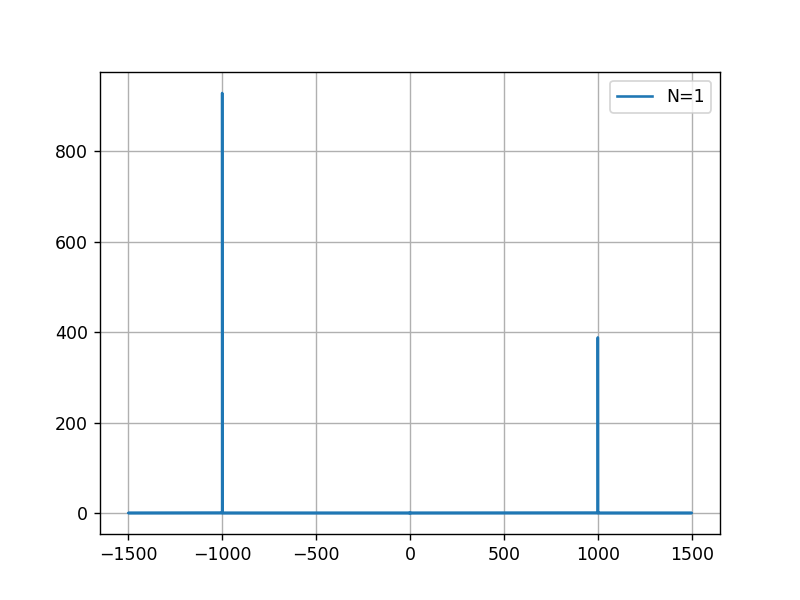

In [10]:
H_1 = omega_m*a3.dag()*a3 + 0.5*omega_R*sz31 + 0.5*omega_R*sz32 + 0.5*omega_R*sz33 - 0.5*g*X*sx31 - 0.5*g_0*X*sx32 - 0.5*g_0*X*sx33
res_1 = qt.correlation_2op_1t(H_1, psi0, times, [], X, X)
freq_1, power_1= signal.periodogram(res_1,fs=1/(times[1]-times[0]))
plt.plot(freq_1, power_1)

print(viivanleveys(freq_1, power_1, True))

plt.grid()
plt.legend(["N=1"])
plt.show()


(0.5199982666666756, -999.4866683666667)


<IPython.core.display.Javascript object>


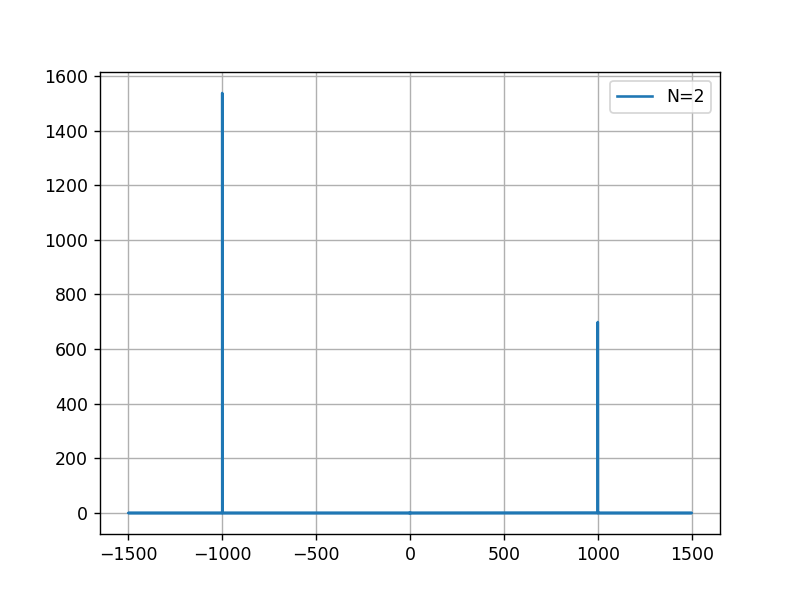

In [11]:
H_2 = omega_m*a3.dag()*a3 + 0.5*omega_R*sz31 + 0.5*omega_R*sz32 + 0.5*omega_R*sz33 - 0.5*g*X*sx31 - 0.5*g*X*sx32 - 0.5*g_0*X*sx33
res_2 = qt.correlation_2op_1t(H_2, psi0, times, [], X, X)
freq_2, power_2= signal.periodogram(res_2,fs=1/(times[1]-times[0]))
plt.plot(freq_2, power_2)

print(viivanleveys(freq_2, power_2, True))

plt.grid()
plt.legend(["N=2"])
plt.show()


In [12]:
H_3 = omega_m*a3.dag()*a3 + 0.5*omega_R*sz31 + 0.5*omega_R*sz32 + 0.5*omega_R*sz33 - 0.5*g*X*sx31 - 0.5*g*X*sx32 - 0.5*g*X*sx33
res_3 = qt.correlation_2op_1t(H_3, psi0, times, [], X, X)
freq_3, power_3= signal.periodogram(res_3,fs=1/(times[1]-times[0]))
plt.plot(freq_3, power_3)

print(viivanleveys(freq_3, power_3, True))

plt.grid()
plt.legend(["N=3"])
plt.show()


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


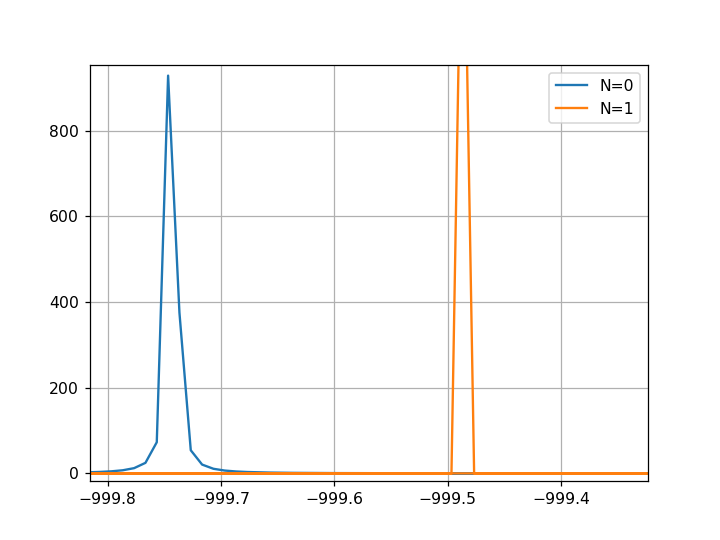

In [15]:
rows = [freq_0, power_0, freq_1, power_1, freq_2, power_2]
np.savetxt("q_lkm0-2" + ".csv", 
           rows,
           delimiter =", ", 
           fmt ='% s')
    

plt.plot(freq_1, power_1)
plt.plot(freq_2, power_2)
plt.grid()
plt.legend(["N=0","N=1", "N=2", "N=3"])
plt.show()

[-999.7466675000001, -999.4866683666667, -999.2366692]


<IPython.core.display.Javascript object>


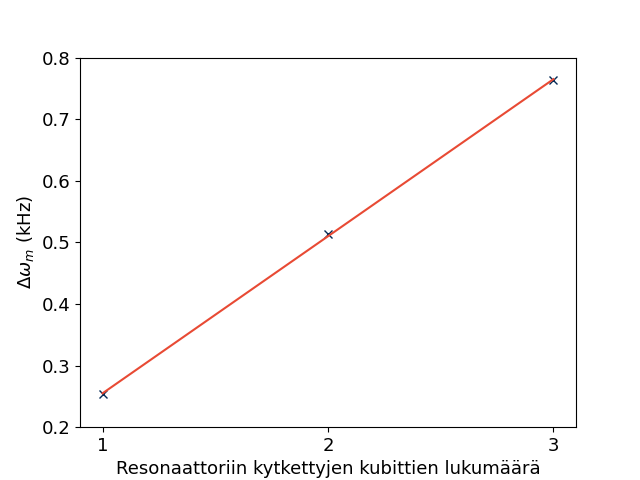

In [8]:
data1= read_csv("q_lkm0-2.csv")
data2= read_csv("q_lkm3.csv")


plt.rcParams['axes.titlesize'] = 36
f = []
i=2
while i < len(data1):
    freq = np.array(data1[i])
    power = np.array(data1[i+1])
    f.append(viivanleveys(freq,power)[1])
    i = i + 2
freq = np.array(data2[0])
power = np.array(data2[1])
f.append(viivanleveys(freq,power)[1])

print(f)

lkm = [1,2,3]
deltaf= np.array(f[0:])+1000
plt.plot(lkm, deltaf , 'x', color='#042b56')

m, b = np.polyfit(lkm, deltaf, 1)
plt.plot(lkm, m*np.array(lkm) + b, color='#e84a34')

plt.xlabel("Resonaattoriin kytkettyjen kubittien lukumäärä", fontsize=13)
plt.ylabel("$\Delta \omega_m$ (kHz)", fontsize=13)
plt.xticks(np.arange(1, 4, 1.0), fontsize=13)
plt.yticks(np.arange(0.2, 0.9, 0.1), fontsize=13)
plt.show()


## Kytkennän vaikutus

In [1]:
"""
Systeemin parametreiksi hilbertin avaruuden koko ja oskilaattorin viritystilojen lukumäärä
"""
N = 10  # Hilbert
n = 3   # Oskillaattori

"""
Luodaan simuloitavat aikapisteet 
"""
t_end = 400           # Kesto s
t_samps = 1200000      # Mittauspisteitä
times = np.linspace(0, t_end, t_samps)  # Aikajana

"""
Määritellään operaattorit oskillaattorin ja spinin yhdistetyssä Hilbert avaruudessa. 
"""
a  = qt.tensor(qt.identity(2), qt.destroy(N))   # Luomis operaattori
sz = qt.tensor(qt.sigmaz(), qt.identity(N))     # Sigma_z
sx = qt.tensor(qt.sigmax(), qt.identity(N))     # Sigma_x
s = qt.tensor( qt.destroy(2), qt.qeye(N))
X = (a.dag() + a)                # paikka/siirtymä??

"""
Määritetään taajuudet
"""
omega_m = 1000*2*np.pi                 # Mekaaninsen värähtelijän taajuus
Omega_R = 1100*2*np.pi                   # Ajon voimakkuus/ rabitaajuus?                

"""
Määritetään aloitustila, jossa spin perustilassaan
"""
psi0 = qt.tensor(qt.ket2dm(qt.basis(2,1)), qt.states.fock_dm(N, n))

"""
Määritetään hamiltonin operaattorin ajastariippumaton osa
"""
lkm = 21
g_list= np.linspace(0,50,lkm) # Kytkentä vakio
print(g_list)

NameError: name 'np' is not defined

[-1000.0066666604167, -999.9991666666667, -999.9991666666667, -999.9966666687501, -999.9941666708335, -999.9891666750001, -999.9841666791668, -999.9791666833335, -999.9741666875001, -999.9666666937501, -999.9591667000001, -999.9491667083335, -999.9416667145834, -999.9291667250001, -999.9191667333334, -999.9066667437501, -999.8941667541668, -999.8816667645834, -999.8666667770834, -999.8516667895834, -999.8366668020834]
[0.027499977083266458, 0.00499999583337285, 0.00499999583337285, 0.004999995833259163, 0.004999995833259163, 0.00499999583337285, 0.00499999583337285, 0.004999995833259163, 0.00499999583337285, 0.00499999583337285, 0.00499999583337285, 0.004999995833259163, 0.004999995833259163, 0.00499999583337285, 0.004999995833259163, 0.00499999583337285, 0.00499999583337285, 0.004999995833259163, 0.00499999583337285, 0.00499999583337285, 0.00499999583337285]


<IPython.core.display.Javascript object>


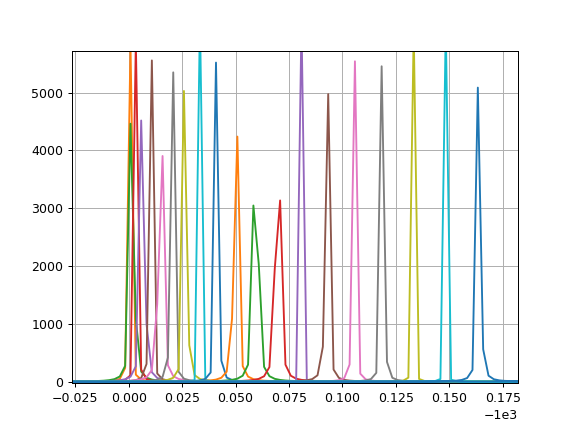

In [33]:
import warnings
warnings.filterwarnings('ignore')
max_res = []
viivanleveys_res = []
results = []
i=0
for g in g_list:
    H_tot = 0.5*Omega_R*sz + omega_m*a.dag()*a - 0.5*g*X*sx 
    res = qt.correlation_2op_1t(H_tot, psi0, times, [], X, X)
    freq, power= signal.periodogram(res,fs=1/(times[1]-times[0]))
    viivanleveys_res.append(viivanleveys(freq, power)[0])
    max_res.append(viivanleveys(freq, power)[1])
    results.append(freq)
    results.append(power)
    plt.plot(freq, power)
    i = i + 1
    print("laskettu " + str(i)+'/'+str(lkm), end="\r")
    
plt.grid()   
print(max_res)
print(viivanleveys_res)
np.savetxt("g_result"+ ".csv", 
           results,
           delimiter =", ", 
           fmt ='% s')
np.savetxt("fwhm_max_g"+ ".csv", 
           [g_list, viivanleveys_res, max_res],
           delimiter =", ", 
           fmt ='% s')
plt.show() 

<IPython.core.display.Javascript object>


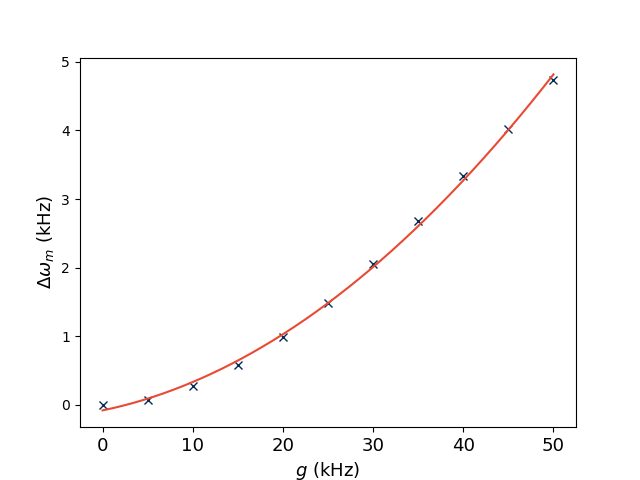

In [9]:
data3 = read_csv("fwhm_max_g.csv")
g = (data3[0][::2])
deltaf = np.array(data3[2][::2])-data3[2][0]
plt.plot(g, deltaf, 'x', color='#042b56')

a, b, c = np.polyfit(g, deltaf, 2)
plt.plot(np.linspace(0,50,500), a*np.linspace(0,50,500)**2+b*np.linspace(0,50,500)+ c, color='#e84a34')

plt.xlabel("$g$ (kHz)", fontsize=13)
plt.ylabel("$\Delta \omega_m$ (kHz)", fontsize=13)
plt.xticks(np.arange(0, 60, 10), fontsize=13)
#plt.yticks(np.arange(0, 0.2, 0.025), fontsize=13)
plt.savefig('g_f'+'.pdf',dpi=300, bbox_inches = 'tight') 
plt.show()

## Kapan ja gamman verrannollisuus viivanleveyteen

In [2]:
lkm = 25

pienin_kappa = 0
suurin_kappa = 100

pienin_gamma = 0
suurin_gamma = 100

kappa = np.linspace(pienin_kappa, suurin_kappa, lkm)
gamma = np.linspace(pienin_gamma, suurin_gamma, lkm)

    
print(kappa)
print(gamma)

[  0.           4.16666667   8.33333333  12.5         16.66666667
  20.83333333  25.          29.16666667  33.33333333  37.5
  41.66666667  45.83333333  50.          54.16666667  58.33333333
  62.5         66.66666667  70.83333333  75.          79.16666667
  83.33333333  87.5         91.66666667  95.83333333 100.        ]
[  0.           4.16666667   8.33333333  12.5         16.66666667
  20.83333333  25.          29.16666667  33.33333333  37.5
  41.66666667  45.83333333  50.          54.16666667  58.33333333
  62.5         66.66666667  70.83333333  75.          79.16666667
  83.33333333  87.5         91.66666667  95.83333333 100.        ]


In [3]:
"""
Systeemin parametreiksi hilbertin avaruuden koko ja oskilaattorin viritystilojen lukumäärä
"""
N = 10  # Hilbert
n = 3   # Oskillaattori

"""
Luodaan simuloitavat aikapisteet 
"""
t_end = 400           # Kesto s
t_samps = 1200000      # Mittauspisteitä
times = np.linspace(0, t_end, t_samps)  # Aikajana

"""
Määritellään operaattorit oskillaattorin ja spinin yhdistetyssä Hilbert avaruudessa. 
"""
a  = qt.tensor(qt.identity(2), qt.destroy(N))   # Luomis operaattori
sz = qt.tensor(qt.sigmaz(), qt.identity(N))     # Sigma_z
sx = qt.tensor(qt.sigmax(), qt.identity(N))     # Sigma_x
s = qt.tensor( qt.destroy(2), qt.qeye(N))
sm = qt.tensor(qt.qeye(N), qt.destroy(2))
X = (a.dag() + a)                # paikka/siirtymä??

"""
Määritetään taajuudet
"""
omega_m = 1000*2*np.pi                 # Mekaaninsen värähtelijän taajuus
Omega_R = 1100*2*np.pi                   # Ajon voimakkuus/ rabitaajuus?
g       = 0                # Kytkentä vakio
mw_detuning = 10*2*np.pi


"""
Määritetään aloitustila, jossa spin perustilassaan
"""
psi0 = qt.tensor(qt.ket2dm(qt.basis(2,1)), qt.states.fock_dm(N, n))

"""
Määritetään hamiltonin operaattorin ajastariippumaton osa
"""
H_r = omega_m*a.dag()*a  # resonattori

H_tot = 0.5*Omega_R*sz + omega_m*a.dag()*a - 0.5*g*X*sx # mw resonanssissa

[2.74999771e-02 2.77499769e+00 5.52749539e+00 8.29249309e+00
 1.10624908e+01 1.38199885e+01 1.65824862e+01 1.93424839e+01
 2.21074816e+01 2.48674793e+01 2.76299770e+01 3.03949747e+01
 3.31549724e+01 3.59149701e+01 3.86799678e+01 4.14399655e+01
 4.42024632e+01 4.69649609e+01 4.97249586e+01 5.24874563e+01
 5.52499540e+01 5.80124517e+01 6.07724494e+01 6.35349471e+01
 6.62949448e+01]


<IPython.core.display.Javascript object>


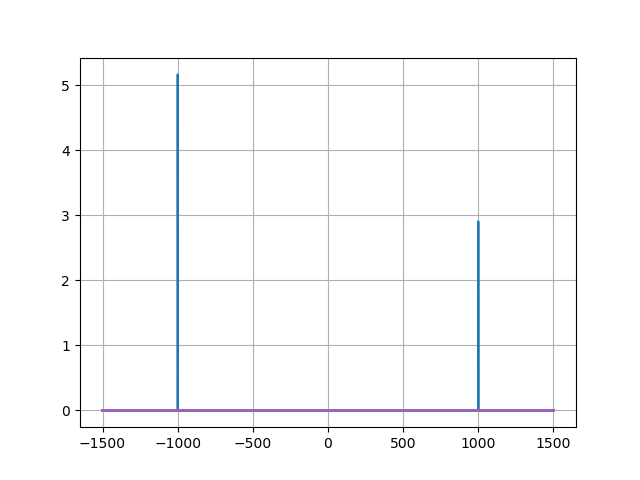

<IPython.core.display.Javascript object>


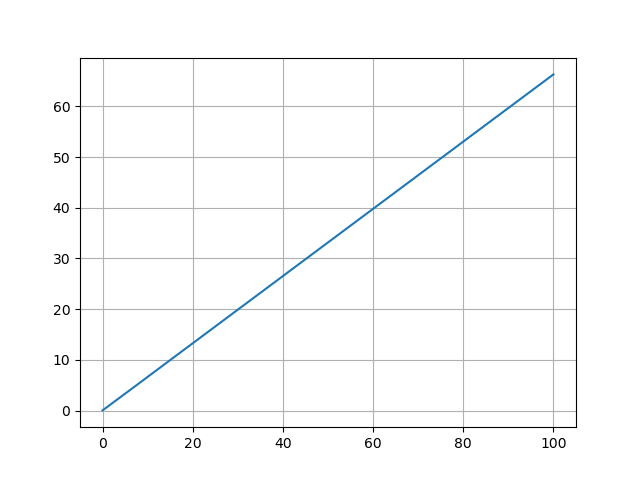

In [4]:
import warnings
warnings.filterwarnings('ignore')
viivanleveys_res= np.zeros(lkm)
results = []

i=0
while i < lkm:
    res = qt.correlation_2op_1t(H_tot, psi0, times, [np.sqrt(kappa[i]*2*np.pi)*a, np.sqrt(kappa[i]*2*np.pi)*a.dag()], X, X)
    freq, power= signal.periodogram(res,fs=1/(times[1]-times[0]))
    viivanleveys_res[i]= viivanleveys(freq, power)[0]
    results.append(freq)
    results.append(power)
    plt.plot(freq, power)
    i = i + 1
    print("laskettu " + str(i)+'/'+str(lkm), end="\r")
    
plt.grid()   
print(viivanleveys_res)
np.savetxt("X_kappa_0_100"+ ".csv", 
           results,
           delimiter =", ", 
           fmt ='% s')
plt.savefig('X_kappa_0_100'+'.pdf',dpi=300) 
plt.show()
plt.plot(kappa, viivanleveys_res)
plt.grid()
plt.show()

In [4]:
import warnings
warnings.filterwarnings('ignore')
viivanleveys_sx= np.zeros(lkm)
results = []

i=0
while i < lkm:
    res = qt.correlation_2op_1t(H_tot, psi0, times, [np.sqrt(gamma[i])*s, np.sqrt(gamma[i])*s.dag()], sx, sx)
    freq, power= signal.periodogram(res,fs=1/(times[1]-times[0]))
    viivanleveys_sx[i]= viivanleveys(freq, power)[0]
    results.append(freq)
    results.append(power)
    plt.plot(freq, power)
    i = i + 1
    print("laskettu " + str(i)+'/'+str(lkm), end="\r")
    
plt.grid()   
print(viivanleveys_sx)
np.savetxt("sx_s"+ ".csv", 
           results,
           delimiter =", ", 
           fmt ='% s')
plt.show()
plt.plot(gamma, viivanleveys_sx)
plt.grid()
plt.show()

[9.99999167e-03 1.24749896e+00 2.66749778e+00 4.16249653e+00
 5.46249545e+00 6.77249436e+00 8.11999323e+00 9.32499223e+00
 1.06674911e+01 1.20874899e+01 1.32824889e+01 1.46924878e+01
 1.57524869e+01 1.72849856e+01 1.85674845e+01 2.00624833e+01
 2.13899822e+01 2.25324812e+01 2.39074801e+01 2.52674789e+01
 2.66774778e+01 2.80024767e+01 2.93499755e+01 3.03274747e+01
 3.15899737e+01]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.005      0.15249987 0.06999994 0.04999996 0.03999997 0.03499997
 0.02999997 0.02749998 0.02499998 0.02499998 0.02499998]


<IPython.core.display.Javascript object>


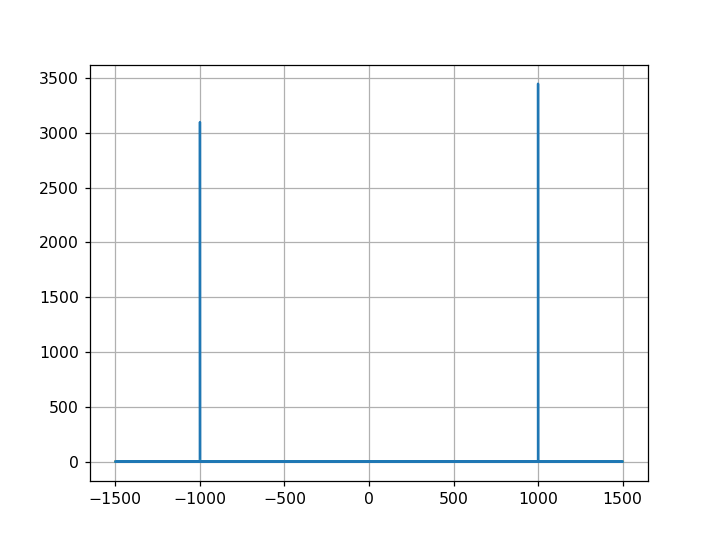

<IPython.core.display.Javascript object>


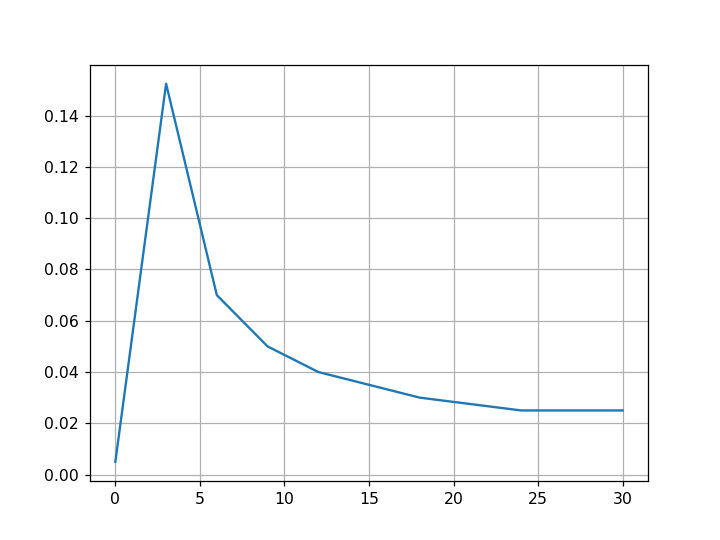

In [27]:
import warnings
warnings.filterwarnings('ignore')
viivanleveys_sx= np.zeros(lkm)
results = []

i=0
while i < lkm:
    res = qt.correlation_2op_1t(H_tot, psi0, times, [np.sqrt(gamma[i])*s, np.sqrt(gamma[i])*s.dag()], X, X)
    freq, power= signal.periodogram(res,fs=1/(times[1]-times[0]))
    viivanleveys_sx[i]= viivanleveys(freq, power)[0]
    results.append(freq)
    results.append(power)
    plt.plot(freq, power)
    i = i + 1
    print("laskettu " + str(i)+'/'+str(lkm), end="\r")
    
plt.grid()   
print(viivanleveys_sx)
np.savetxt("X_s_iso"+ ".csv", 
           results,
           delimiter =", ", 
           fmt ='% s')
plt.show()
plt.plot(gamma, viivanleveys_sx)
plt.grid()
plt.show()

In [24]:
gamma = np.linspace(0,5,11)
print(gamma)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


[0.005      0.15749987 0.37749969 0.39999967 0.25999978 0.19249984
 0.15249987 0.12749989 0.10999991 0.09749992 0.08499993]


<IPython.core.display.Javascript object>


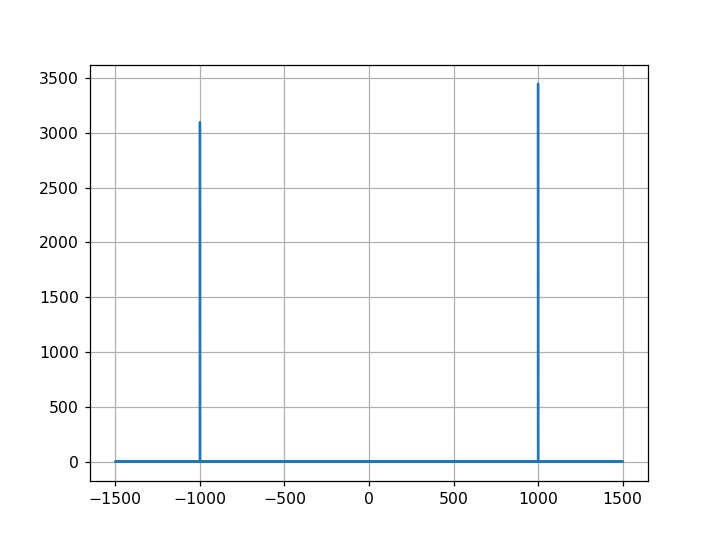

<IPython.core.display.Javascript object>


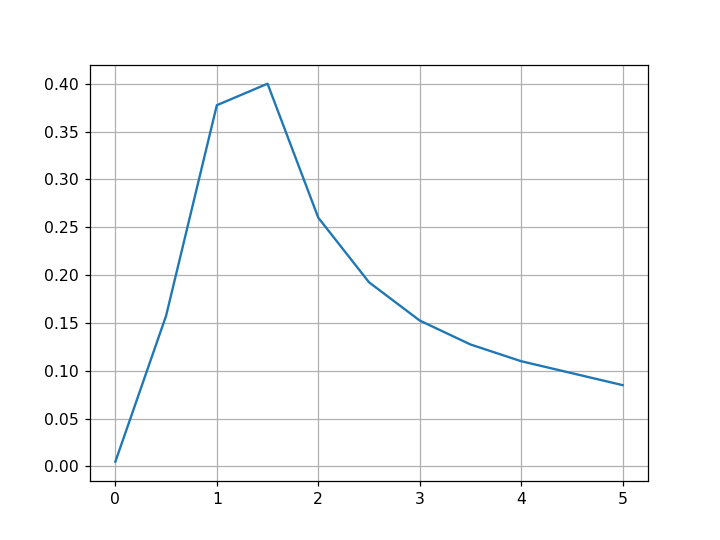

In [25]:
import warnings
warnings.filterwarnings('ignore')
viivanleveys_sx= np.zeros(lkm)
results = []

i=0
while i < lkm:
    res = qt.correlation_2op_1t(H_tot, psi0, times, [np.sqrt(gamma[i])*s, np.sqrt(gamma[i])*s.dag()], X, X)
    freq, power= signal.periodogram(res,fs=1/(times[1]-times[0]))
    viivanleveys_sx[i]= viivanleveys(freq, power)[0]
    results.append(freq)
    results.append(power)
    plt.plot(freq, power)
    i = i + 1
    print("laskettu " + str(i)+'/'+str(lkm), end="\r")
    
plt.grid()   
print(viivanleveys_sx)
np.savetxt("X_s_pieni"+ ".csv", 
           results,
           delimiter =", ", 
           fmt ='% s')
plt.show()
plt.plot(gamma, viivanleveys_sx)
plt.grid()
plt.show()

In [8]:
lkm = 15
gamma = np.linspace(30, 100, lkm)
print(gamma)

[ 30.  35.  40.  45.  50.  55.  60.  65.  70.  75.  80.  85.  90.  95.
 100.]


[0.02499998 0.02499998 0.02499998 0.02499998 0.02499998 0.02499998
 0.02499998 0.02999997 0.02999997 0.02999997 0.02999997 0.03249997
 0.03499997 0.03499997 0.03749997]


<IPython.core.display.Javascript object>


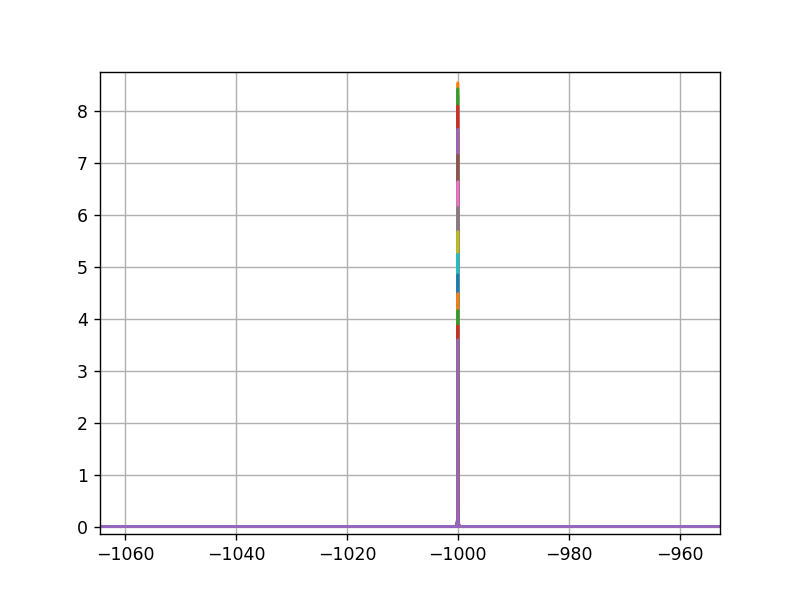

<IPython.core.display.Javascript object>


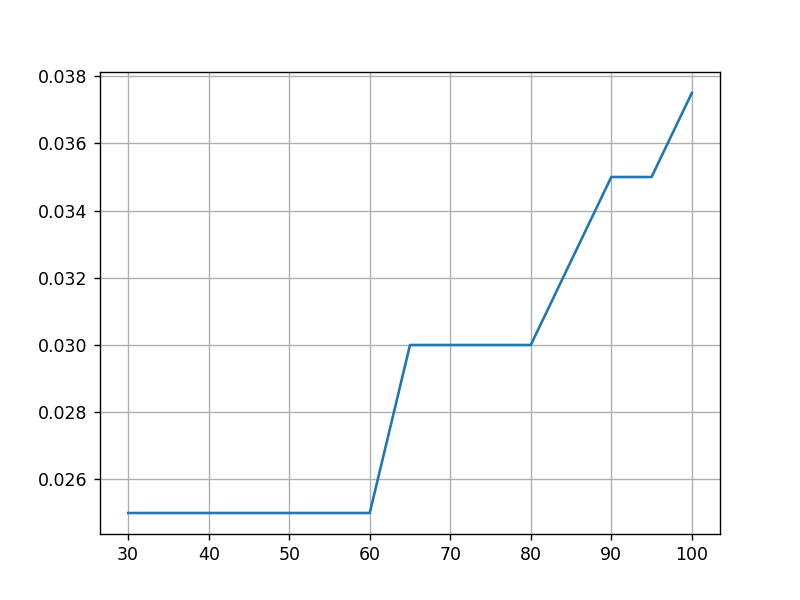

In [9]:
import warnings
warnings.filterwarnings('ignore')
viivanleveys_sx= np.zeros(lkm)
results = []

i=0
while i < lkm:
    res = qt.correlation_2op_1t(H_tot, psi0, times, [np.sqrt(gamma[i])*s, np.sqrt(gamma[i])*s.dag()], X, X)
    freq, power= signal.periodogram(res,fs=1/(times[1]-times[0]))
    viivanleveys_sx[i]= viivanleveys(freq, power)[0]
    results.append(freq)
    results.append(power)
    plt.plot(freq, power)
    i = i + 1
    print("laskettu " + str(i)+'/'+str(lkm), end="\r")
    
plt.grid()   
print(viivanleveys_sx)
np.savetxt("X_s_30_100"+ ".csv", 
           results,
           delimiter =", ", 
           fmt ='% s')
plt.show()
plt.plot(gamma, viivanleveys_sx)
plt.grid()
plt.show()

In [10]:
np.savetxt("X_30_100"+ ".csv", 
           [gamma, viivanleveys_sx],
           delimiter =", ", 
           fmt ='% s')

In [6]:
print(np.linspace(2, 30, 17))

[ 2.    3.75  5.5   7.25  9.   10.75 12.5  14.25 16.   17.75 19.5  21.25
 23.   24.75 26.5  28.25 30.  ]


<IPython.core.display.Javascript object>


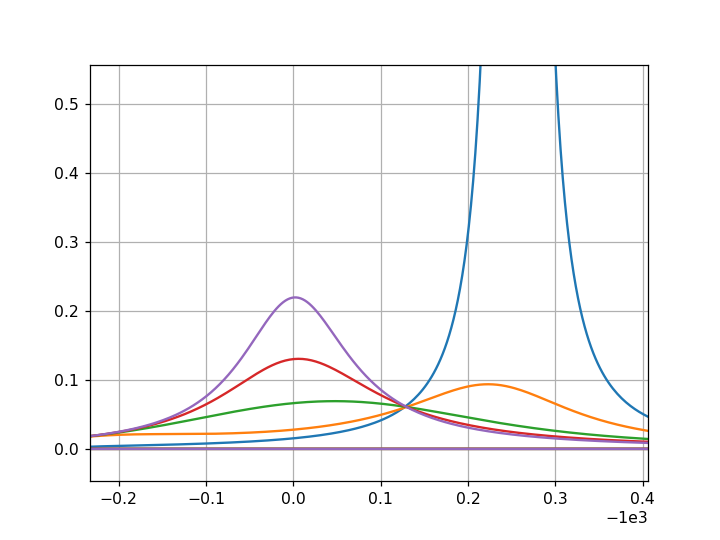

[0.01   0.7575 1.505  2.2525 3.    ]
[0.00749999 0.2449998  0.39749967 0.21999982 0.15249987]
[-999.74166688 -999.77666685 -999.95166671 -999.99416667 -999.99666667]


<IPython.core.display.Javascript object>


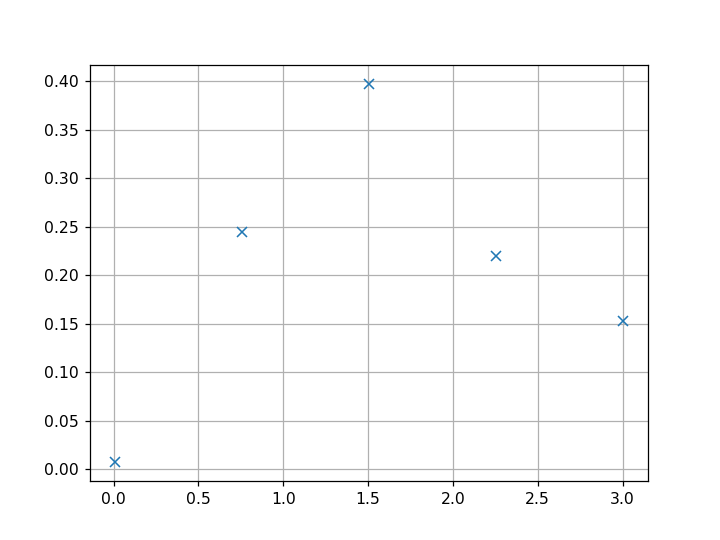

<IPython.core.display.Javascript object>


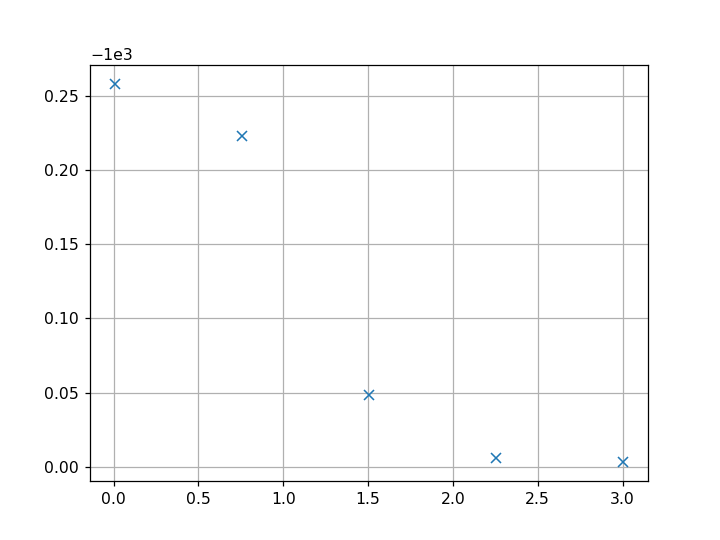

In [6]:
import warnings
warnings.filterwarnings('ignore')

"""
Systeemin parametreiksi hilbertin avaruuden koko ja oskilaattorin viritystilojen lukumäärä
"""
N = 10  # Hilbert
n = 3   # Oskillaattori

"""
Luodaan simuloitavat aikapisteet 
"""
t_end = 400           # Kesto s
t_samps = 1200000      # Mittauspisteitä
times = np.linspace(0, t_end, t_samps)  # Aikajana

"""
Määritellään operaattorit oskillaattorin ja spinin yhdistetyssä Hilbert avaruudessa. 
"""
a  = qt.tensor(qt.identity(2), qt.destroy(N))   # Luomis operaattori
sz = qt.tensor(qt.sigmaz(), qt.identity(N))     # Sigma_z
sx = qt.tensor(qt.sigmax(), qt.identity(N))     # Sigma_x
s = qt.tensor( qt.destroy(2), qt.qeye(N))
sm = qt.tensor(qt.qeye(N), qt.destroy(2))
X = (a.dag() + a)                # paikka/siirtymä??

"""
Määritetään taajuudet
"""
omega_m = 1000*2*np.pi                 # Mekaaninsen värähtelijän taajuus
Omega_R = 1100*2*np.pi                   # Ajon voimakkuus/ rabitaajuus?
g       = 10*2*np.pi                 # Kytkentä vakio
mw_detuning = 10*2*np.pi


"""
Määritetään aloitustila, jossa spin perustilassaan
"""
psi0 = qt.tensor(qt.ket2dm(qt.basis(2,1)), qt.states.fock_dm(N, n))

"""
Määritetään hamiltonin operaattorin ajastariippumaton osa
"""
H_tot = 0.5*Omega_R*sz + omega_m*a.dag()*a - 0.5*g*X*sx # mw resonanssissa

gamma = np.linspace(0.01, 3, 5)
lkm = len(gamma)
leveys = np.zeros(lkm)
max_f = np.zeros(lkm)
results = []


i=0
while i < lkm:
    res = qt.correlation_2op_1t(H_tot, psi0, times, [np.sqrt(gamma[i])*s, np.sqrt(gamma[i])*s.dag()], X, X)
    freq, power= signal.periodogram(res,fs=1/(times[1]-times[0]))
    leveys[i] = viivanleveys(freq, power)[0]
    max_f[i] = viivanleveys(freq, power)[1]
    results.append(freq)
    results.append(power)
    plt.plot(freq, power)
    i = i + 1
    print("laskettu " + str(i)+'/'+str(lkm), end="\r")
    
plt.grid()   
plt.show()

print(gamma)
print(leveys)
print(max_f)

plt.plot(gamma, leveys, 'x')
plt.grid()
plt.show()

plt.plot(gamma, max_f, 'x')
plt.grid()
plt.show()

np.savetxt("400s"+ ".csv", 
           [gamma, leveys, max_f],
           delimiter =", ", 
           fmt ='% s')

In [9]:
"""
Systeemin parametreiksi hilbertin avaruuden koko ja oskilaattorin viritystilojen lukumäärä
"""
N = 10  # Hilbert
n = 3   # Oskillaattori

"""
Luodaan simuloitavat aikapisteet 
"""
t_end = 400           # Kesto s
t_samps = 1200000      # Mittauspisteitä
times = np.linspace(0, t_end, t_samps)  # Aikajana

"""
Määritellään operaattorit oskillaattorin ja spinin yhdistetyssä Hilbert avaruudessa. 
"""
a  = qt.tensor(qt.identity(2), qt.destroy(N))   # Luomis operaattori
sz = qt.tensor(qt.sigmaz(), qt.identity(N))     # Sigma_z
sx = qt.tensor(qt.sigmax(), qt.identity(N))     # Sigma_x
s = qt.tensor( qt.destroy(2), qt.qeye(N))
sm = qt.tensor(qt.qeye(N), qt.destroy(2))
X = (a.dag() + a)                # paikka/siirtymä??

"""
Määritetään taajuudet
"""
omega_m = 1000*2*np.pi               # Mekaaninsen värähtelijän taajuus
Omega_R = 1100*2*np.pi               # Ajon voimakkuus/ rabitaajuus?
g       = 10*2*np.pi                 # Kytkentä vakio
gamma = 100

"""
Määritetään aloitustila, jossa spin perustilassaan
"""
psi0 = qt.tensor(qt.ket2dm(qt.basis(2,1)), qt.states.fock_dm(N, n))

"""
Määritetään hamiltonin operaattorin ajastariippumaton osa
"""
H_tot = 0.5*Omega_R*sz + omega_m*a.dag()*a - 0.5*g*X*sx # mw resonanssissa




res = qt.correlation_2op_1t(H_tot, psi0, times, [np.sqrt(gamma)*s, np.sqrt(gamma)*s.dag()], X, X)
freq, power= signal.periodogram(res,fs=1/(times[1]-times[0]))

  
plt.plot(freq, power, color='#042b56')
plt.savefig('result'+'.pdf',dpi=300) 
plt.show()

KeyboardInterrupt: 

[0.001      0.05357895 0.10615789 0.15873684 0.21131579 0.26389474
 0.31647368 0.36905263 0.42163158 0.47421053 0.52678947 0.57936842
 0.63194737]
[0.004      0.01599999 0.03199998 0.04999997 0.06599996 0.08199995
 0.09799993 0.11599992 0.13199991 0.1479999  0.16599989 0.18399988
 0.20199987]
[-999.7433335  -999.7433335  -999.7433335  -999.7433335  -999.7453335
 -999.7453335  -999.7473335  -999.7493335  -999.7513335  -999.7553335
 -999.75733349 -999.76133349 -999.76533349]


<IPython.core.display.Javascript object>


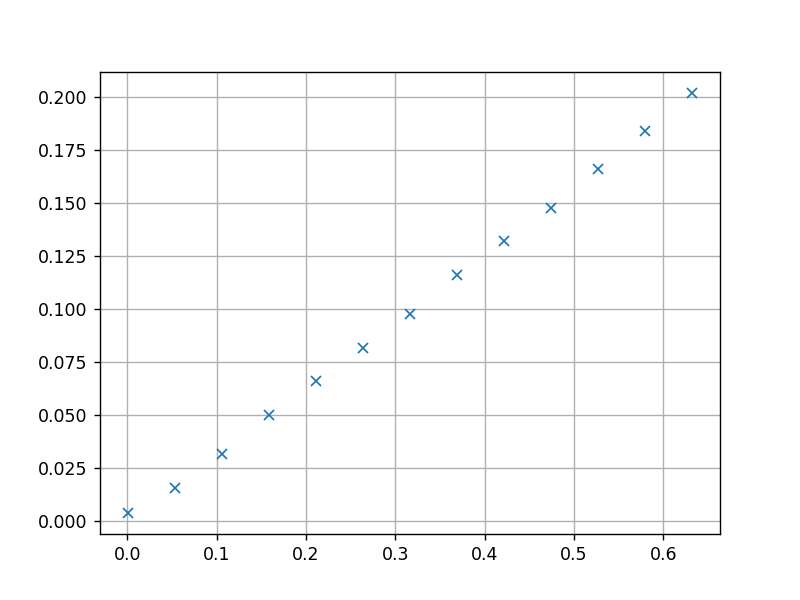

<IPython.core.display.Javascript object>


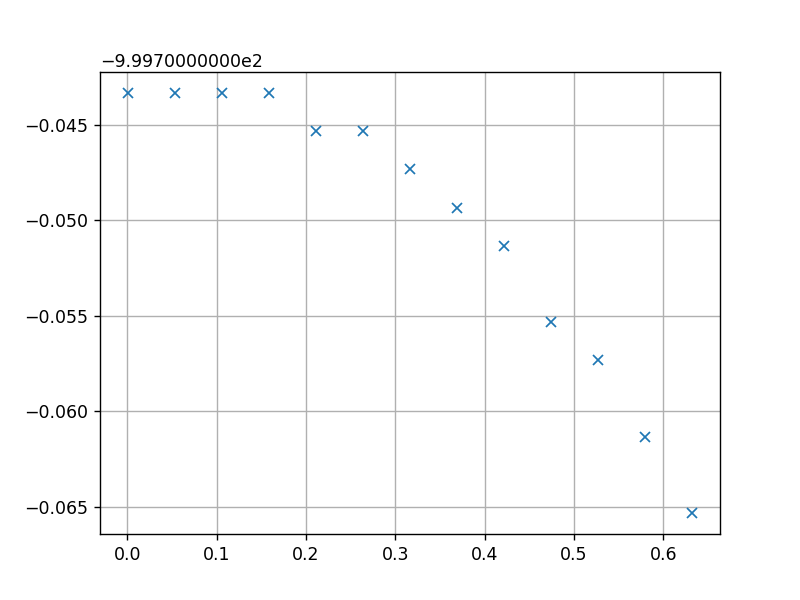

In [37]:
print(gamma[:13])
print(leveys[:13])
print(max_f[:13])

plt.plot(gamma[:13], leveys[:13], 'x')
plt.grid()
plt.show()

plt.plot(gamma[:13], max_f[:13], 'x')
plt.grid()
plt.show()

np.savetxt("aika"+ ".csv", 
           [gamma[:13], leveys[:13], max_f[:13]],
           delimiter =", ", 
           fmt ='% s')